
# PHAS0030 Logbook

# Cellular Automata Modelling of Motorway Traffic 
### Author: 19090524


# Introduction 

This project uses the Cellular Automata method to simulate the flow of traffic for a one-lane system. The space-time diagrams for one-lane traffic will be generated, and three road parameters ( Dawdling probability, Road density, Maximum speed of cars) will be varied to study their effects on the traffic flows, respectively. Results of the study will be shown in the form of space-time plots and graphes. Because of the length of the logbook, it was splitted into different sections.

### Contents <a name='Contents'></a>

1. [One-Lane system](#One-Lane)
   1. [Generating lane and one car on the lane](#Car,Lane)
   2. [Generating new cars and implementing rules (1)](#Cars,Rule)
   3. [Rule 2](#Rule2)
   4. [Rule 3](#Rule3)
   5. [Rule 4](#Rule4)
   6. [Simulation of traffic system](#Simulation1)
       1. [Part 1](#1)
       2. [Part 2](#2)
       3. [Part 3 (Contains final code)](#3)
   7. [Results (Final code)](#Result1)
   
   
   
2. [Two-Lane system](#Multi-Lane)
   1. [Generation of Two-Lane](#2Lane)
   2. [Rules for lane changing (Implementation to be continued )](#Rules)
   2. [Future work](#Future,Work)
   

3. [References](#References)

In [1]:
# Import modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# One-Lane system <a name='One-Lane'></a>

## Generating lane and one car on the lane <a name='Car,Lane'></a>

### Date: 31/01/2021

Upon meeting the supervisor and teammates, and hearing their advices, it will be good to start the simulation by just generating an simple array. The array will represent a traffic road in this simulation.

In [2]:
Road = np.zeros(10)
print(Road)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Date: 5/02/2021

To generate a number of cars on the road, in which 1 labels the car and 0 to labels an unoccupied space, I generate a np.array (Road) and use np.roll to represent the movement of a car of speed v = 1 $ cell/timestep$ along the road. Note that np.roll applies to cars that move with constant speeds, but may be more difficult to apply to cars that move with varying speeds, as in the case for acceleration and deceleration. (Credit: my supervisor and teammates)

In [3]:
Vc = 1
n = 0

Road = np.zeros((10,10))
Road[0,0] = 1

while abs(n*Vc) < (len(Road)-Vc):
    Road[n+1] = np.roll(Road[n], Vc)
    n += 1

print(Road)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Generating new cars and implementing rules (1) <a name='Car,Lane'></a>


### Date: 7/02/2021

With the NumPy array generated to represent the road and the integer generated to represent a car moving at constant speed, we can now go on to generate more cars on the road and to implement rule one of cellular automata. 

However, note that because the road can now take on more than one car and the speeds of each car may be different, it could be difficult to implement this rule simply by appling np.roll. Therefore, we shall now generate vehicles using a different method; This is done by iterating over each timestep in order to generate cars with an given initial velocity. If the number of iterations divided by the rate of new cars added to road is equal to a reminder of 1, a new car will be generated at the first element of the road (array) with a given initial speed. Here is part of the codes that I used to generate cars:

        if Timestep%rate ==1:
            Road[0]= Vinit    
            
Note: Full code will be shown in later section with 4 rules implemented
        
Now I go to implement Rule 1, which states that a car with speed $V_{car} < V_{max}$ will be able to increase the speed if the car in front is far enough. This means that cars will need to be aware of their speeds and their distance to next car. I implement Rule 1 by assuming there is no car in front of the accelerating car. Here's part of the code: 
       

In [25]:
# Define parameters
length = 10
Timestep_total = 3
V_max = 9 
rate = 2
Vinit = 4

# Road Generation
Road = np.zeros(length)  

# Initial timestep
Timestep = 1

# Set up timestep array
Timestep_tot = np.arange(Timestep_total)
    
# Iterate over timesteps of array.
while Timestep in Timestep_tot:
        
    ## CA Rule 1 ##
        
    # If the velocity v of a car is less than V_max and if the distance 
    # to next car is larger than v+1, the car speed increases by 1.
    
    for i in range(np.size(Road)-V_max):
        if Road[i] > 1:                               
            if np.sum(Road[i+1:int(Road[i])+i+1], dtype=np.int32) == 0:
                if V_max  > Road[i]:
                    Road[i] += 1
                        
    # Rate of cars joining road
    if Timestep%rate == 1:
        Road[0] = Vinit 
    
    # Update timestep
    Timestep +=1 
    
    # Print road
    print(Road)
             

[4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Rule 2 <a name='Rule2'></a>

### Date: 10/02/2021

The implementation of Rule 2 is similar to Rule 1 because the distance between cars is an important factor to consider. In order to find their distance I applied a code that iterates across the cell ( distance) between the car behind and the car in front, thereby allowing their distance to be calculated. Below is the code:

       
        n = 0
        if Road[i+1] < 1e-4:  # If there no car directly ahead 
            while Road[n+i]<1 and n < V_max: 
                n+=1    
            
            Road[i]=n # n = distance between respective cars               
        else:
            Road[i]=1    

Additionally, here's the output for one iteration of the resulting array, when Rule 2 gets implemented:

    [1. 0. 0. 0. 0. 5. 6. 0. 0. 0.]
    [2. 0. 0. 0. 0. 5. 7. 0. 0. 0.]

Note that at index = 5 of the array, the speed of the car should decrease, not staying the same. To solve this problem, we impose a condition in which the speed of the car will decrease to zero if there is a car just in front of it. In addition, we meet another problem; in the context of the road's array, unoccupied and stationary cars are both denoted by 0. This indicates that stationary cars no longer exist in the array. To solve this problem I apply shift to cars' speeds. Therefore, the stationary cars are now represented by the integer 1, and cars that move at speed $v$ will now be represented by $v+1$. Below are the arrays that reflect this change:

    [2. 0. 0. 0. 0. 3. 4. 0. 0. 0.]
    [3. 0. 0. 0. 0. 1. 5. 0. 0. 0.]
   
Note that in this array, the 5th index shows a car initially moving with a speed 3 but then slows down to 0, which is represented by the integer 1. At the 6th index, a car moving with a speed 4 is now represented by the integer 5. 

Below shows the modified code:

        n = 0
        if Road[i+1] < 1e-4:  # If there no car directly ahead 
            while Road[n+1+i]<1: # Note that 1 is added on to account for Road element 
                                 # index 1 greater than car speed 
                n+=1               
            Road[i]=n            # n = distance between respective cars   
                        
        # if there is car directly ahead, reduce speed to zero
        else:
            Road[i]=1 .                

## Rule 3 <a name='Rule3'></a>

### Date: 12/02/2021

Prof. Bowler has given us one advice of using `np.random.randint()` to implement Rule 3. Hence, to implement Rule 3, which states that speed of each car will be decreased by 1 (with a probability p) due to dawdling, a number generator, from integer 0 to 100, is used to randomly assign one number to each car. If the number assigned to a car is less than dawdling probability (in percentage), then a car's speed is reduced by 1 in the next timestep. Code for this Rule is given below:

    if  Prob_dawdle*100 > np.random.randint(0, 100):        
        if Road[i]>1:                                     
        Road[i]-=1
                        


## Rule 4 <a name='Rule4'></a>

### Date: 15/02/2021

Unlike the previous Cellular Automata, to implement Rule 4, the cars should now move through road array if they possess speeds, rather than staying at the same elements of the array. 


The element values of cars are represented by $v+1$, where $v$ is their speeds. In order to advance these cars by $v$ (speed) at each timestep, first move each individual element in the array by $v+1$ sites and then remove the element that car is originally located at. This leads to each car moving by $v$ site per timestep, which is equal to its speed. 


The code I used is shown below :

for i in Lengthened_Road1:
    
    Advance = i
    if i+int(Road[i])<length:      
        Road= np.insert(Road, Advance+int(Road[i]), Road[i])       
            Road = np.delete(Road, i)
            
               
Secondly, for cars at the end of the road that will eventually travel past the road, we need to fill the road elements where they are located at by zero. This denotes that cars will leave and disappear from the road when they move past its end. In addition, one problem that I faced was that cars in front are overwritten by cars that will move forward to where the front cars are located. To resolve this problem, we used a loop that iterates from the end to beginning of the road. Here is the code I used:
    
    Road_L1 = np.arange(np.size(Road)-1, -1, -1)
    
    for i in Road_L1:    
        if i+int(Road[i])>length:            
            Road[i]=0         

       
Another problem seen in the code is that stationary car will not start to move across the array even if there is no car ahead of it. To resolve this problem, a code is used to ensure that stationary car with no car in front will begin to move. Below is the code:
    
    if Road[i]==1: 
        if Road[i+1] < 1e-4: 
            Road[i]=2
            
          
Rule 4 can now be implemented to this traffic system for open system. (Note that Rule 4 is changed later for closed system)

`Written using the help of https://numpy.org/doc/stable/reference/generated/numpy.insert.html and the book 'Programming for computation - Python' given by the link https://link.springer.com/content/pdf/10.1007%2F978-3-030-16877-3.pdf.)`

## Simulation of traffic system <a name='Simulation1'></a>


### Part 1  <a name='1'></a>
### Date: 17/02/2021

With the 4 Rules, I can now begin my effort to simulate of a single-lane traffic system. The code for traffic system is defined by a function that is able to call various parameters, such as the length of the road and its density. 

Additionally, note that for better representation, the cars and the roads should not be represented by numbers. Therefore, to improve the illustration of the road, we first generate a matrix that stores the numbers representing the status of each site on the road( empty = 0, stationary cars = 1 or moving cars > 1), and then categorizes them according to different statuses. Below is the code:

    Mx = np.zeros((Timestep_total, length))
    
    Timestep_tot = np.arange(Timestep_total)
    
        while Timestep in Timestep_tot:
        
            L2_Road = np.arange(np.size(Road))
            
            for i in L2_Road :
                if Road[i]==0:
                    Mx[Timestep, i]= 0
            else:
                Mx[Timestep, i]= 1

Subsequently, the matrix is displayed using `imshow()`. This allows me to glean a clearer perspective of the traffic and to better observe its flow over timesteps.

Below outputs the road illustration:

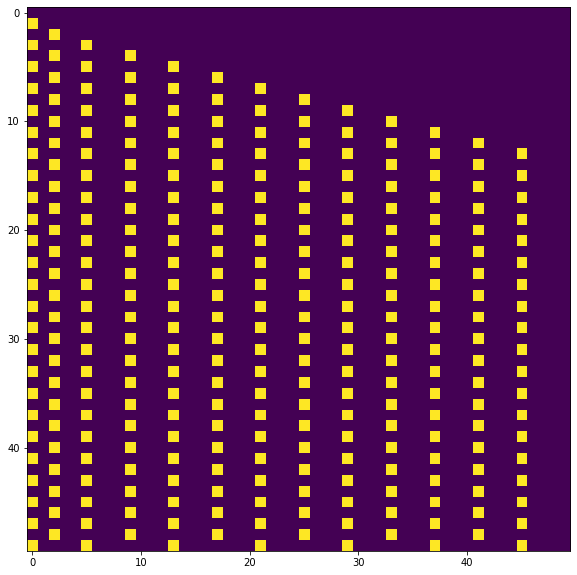

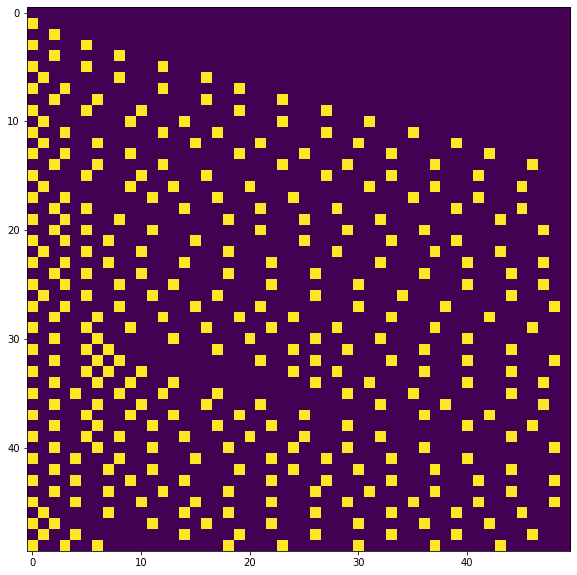

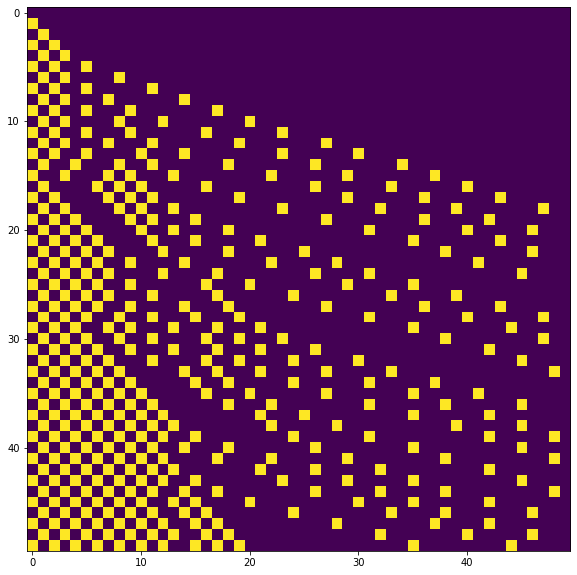

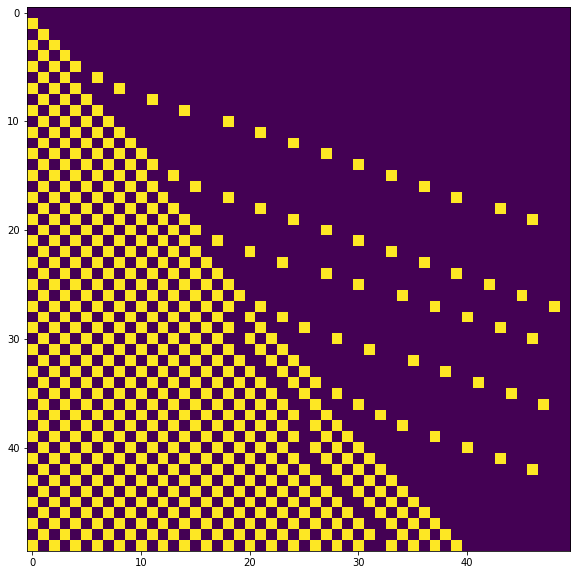

In [23]:
# Written using the help of Numpy documentation given by link
# https://numpy.org/doc/stable/reference/generated/numpy.insert.html 
# ,the book 'Programming for computation - Python' given by 
# the link https://link.springer.com/content/pdf/10.1007%2F978-3-030-16877-3.pdf.
# And professor. 

def Open_Single_Lane_Traffic(length, Vinit, V_max, rate, Timestep_total, Prob_dawdle):
    ''' Returns a CA simulation of road system whereby cars drive under a number 
    of traffic rules
        
    Inputs:
    length          The length of the road 
    Vinit           Initial speed of a car
    V_max           Maximum speed of a car
    rate            Number of cars fed to road per timestep
    prob_car_daw    Car Dawdling probability 
    Timestep_total  Total number of timesteps  
        
    Output:
    Simulation of road system
    ''' 
    
    # Define initial timestep and generate road
    Timestep = 1
    Road = np.zeros(length)  
    Timestep_tot = np.arange(Timestep_total)
    Mx = np.zeros((Timestep_total, length))
    
    # Define tolerance
    Tolerance = 1e-4
    
    

    # Iterate over timesteps of array.
    while Timestep in  Timestep_tot:
        
    

        ###################### CA Rule 1 ###################
        
        # If the velocity v of a car is less than V_max and if the distance 
        # to next car is larger than v+1, the car speed increases by 1
        
        Road_L = np.arange(np.size(Road)-V_max)
        
        for i in Road_L:
            if Road[i] > 1:                               
                if np.sum(Road[i+1:int(Road[i])+i+1], dtype=np.int32) == 0:
                    if V_max  > Road[i]:
                        Road[i] += 1
                        
            
                ###################### CA Rule 2 ###################
                
                # If a car at site i sees next vehicle at site i+j,
                # with speed j < v, it reduces speed to j - 1
                
                else:
                    n = 0
                    
                    # Calculate distance between two cars, if there is car n site ahead, car speed will be n-1
                    
                    if Road[i+1] < Tolerance:      
                        # Note that 1 is added on to account for road index 1 greater than car speed
                        
                        while Road[n+1+i]<1 and n < V_max: 
                            n+=1  
                        Road[i]=n # n = distance between respective cars   
                        
                   # if there is car directly ahead, reduce speed to zero
                    else:
                        Road[i]=1
                            
                ###################### CA Rule 3 ###################
                
                # At probability p, each car reduces its speed by 1 
                
                if Prob_dawdle*100 >= np.random.randint(1, 100):       
                    if Road[i]>1:                                     
                        Road[i]-=1
                        
        ##################### CA Rule 4 ###################
            
            # Each car moves by v sites.
            
            # Account for a stationary car .
            if Road[i]==1:  
                # If no car ahead the stationary car will move at v = 1             
                if Road[i+1] < Tolerance: 
                    Road[i]=2
         
        # Iterate from end to start of road because cars in front need to move first
        
        Road_L1 = np.arange(np.size(Road)-1, -1, -1)
        
        for i in Road_L1: 
            
            # Cars advance through road
            Advance = i
            if i+int(Road[i])<length: 
        
                Road= np.insert(Road, Advance+int(Road[i]), Road[i])       
                Road = np.delete(Road, i)

            # Cars will disappear when they leave the road    
            else:
                Road[i]=0
        
                    
        ##################################################
        
        # Rate of cars joining road
        if Timestep%rate ==1:
            Road[0]= Vinit                                               
        

        # Road's Illustration  
        L2_Road = np.arange(length)
        
        for i in L2_Road:
            if Road[i]==0:
                Mx[Timestep, i]= 0
            else:
                Mx[Timestep, i]= 1
        
        # Update timestep
        Timestep+=1
            
    # Road's Illustration  
        
    plt.figure(figsize = (10,10))
    plt.imshow(Mx)


############# Output the road simulation for various dawdling probabilities ############
for i in range(0, 100 , 25):
    Open_Single_Lane_Traffic(50, 2, 5, 2, 50, i/100) 

#### Comment:

From the illustration of traffic system above, we can see how changing the dawdling probability of cars affect the distribution of cars on the road. 

Specifically, 4 traffic systems are shown for dawdling probabilities of $0\%$, $25\%$, $50\%$ and $75\%$ over $50$ timesteps.  For these varying probabilities, we observe that when the dawdling probabilities increases on the road, cars are more likely to clump together, and we can see more jams being formed. 




### Part 2  <a name='2'></a>
### Date: 20/02/2021

In addition to observing the effects of varying dawdling probability on the road, we can also look at other important parameters, such as the density of traffic. 

The first traffic simulation adapted the open road system, and this is a system whereby cars of various speeds are being fed to a road at various time. However, a problem with this system is that at some time of the road simulation, less cars are generated at the beginning of the road than number of cars that will leave the road. Therefore, the road's density fluctuates throughout the timesteps of road simulation. 

In order to solve this issue, an closed system will be implemented for the simulation, because this system holds a constant number of cars on the road, and cars leaving the road will loop around to join at the beginning of the road, the road's density can be constant  more easily under this system.  

To generate a closed system for the road whereby cars will loop around it like a circle, we first copy the last 6 spaces of the road, add 6 un-occupied spaces and then attach them (along with the road)  with `np.concatenate()` and `np.append()` . Here's the code:

    Road = np.concatenate((Road, Road[:6], np.zeros(6)))
    
Subsequently, when the cars move along the road, the 6 un-occupied spaces at the right will now be ocuppied by the replica cars from the last 6 spaces of the road. The 6 spaces at the right will then be removed from the right and be placed to front of the road, thus generating a loop. The road will then be decreased to a length of 24 cells. Below is the code:

    Road = np.append(Road[-12:-6], Road[6:-12]).
    
Given the new closed system, a couple of codes associated with the CA Rules can be discarded from the open road system. For example, we can discard this code from Rule 4:

    if i+int(Road[i])>length:            
        Road[i]=0 
    
This is because the cars may now move into a lengthened road in a closed-loop system, rather than disappearing when they drive past the end of the road (its length) .
    
Now we can map the closed system traffic.

Below shows the simulation of the system: 

In [19]:
# Written using the help of Numpy documentation given by link
# https://numpy.org/doc/stable/reference/generated/numpy.insert.html 
# ,the book 'Programming for computation - Python' given by 
# the link https://link.springer.com/content/pdf/10.1007%2F978-3-030-16877-3.pdf.
# And professor. 

def Closed_Single_Lane_Traffici(length, Den, Vinit, V_max, rate, Timestep_total, Prob_dawdle):
    ''' Returns a CA simulation of road system whereby cars drive under a number 
    of traffic rules
        
    Inputs:
    length          The length of the road 
    Den             Density of the traffic
    Vinit           Initial speed of a car
    V_max           Maximum speed of a car
    rate            Number of cars fed to road per timestep
    prob_car_daw    Car Dawdling probability 
    Timestep_total  Total number of timesteps  
        
    Output:
    Simulation of road system
    ''' 
    
    # Generate road and define initial timestep and matrix
    Timestep = 1
    Road = np.zeros(length)  
    Mx = np.zeros((Timestep_total, length))
    Timestep_tot = np.arange(Timestep_total)
    
    # Define Tolerance
    Tolerance = 1e-4
    

    # Iterate over timesteps of array.
    while Timestep in Timestep_tot:
        
        
        Road = np.concatenate((Road, Road[:6], np.zeros(6))) 
        

        ###################### CA Rule 1 ###################
        
        # If the velocity v of a car is less than V_max and if the distance 
        # to next car is larger than v+1, the car speed increases by 1
        
        L_Road = np.arange(np.size(Road)-V_max)

        for i in L_Road:
            if Road[i] > 1:                               
                if np.sum(Road[i+1:int(Road[i])+i+1], dtype=np.int32) == 0:
                    if V_max  > Road[i]:
                        Road[i] += 1
                        
            
                ###################### CA Rule 2 ###################
                
                # If a car at site i sees next vehicle at site i+j,
                # with speed j < v, it reduces speed to j - 1
                
                else:     
                    n = 0
                    
                    # Calculate distance between two cars, if there is car n site ahead, car speed will be n-1
                    
                    if Road[i+1] < Tolerance:      
                        # Note that 1 is added on to account for road index 1 greater than car speed
                        
                        while Road[n+1+i]<1 and n < V_max: 
                            n+=1  
                        Road[i]=n # n = distance between respective cars   
                        
                   # if there is car directly ahead, reduce speed to zero
                    else:
                        Road[i]=1
               
                ###################### CA Rule 3 ###################
                
                # At probability p, each car reduces its speed by 1 
                
                if Prob_dawdle*100 > np.random.randint(0, 100):       
                    if Road[i]>1:                                     
                        Road[i]-=1
                                        
                        
        ##################### CA Rule 4 ###################
            
            # Each car moves by v sites.
            
            # Account for a stationary car .
            if Road[i]==1:  
                # If no car ahead the stationary car will move at v = 1             
                if Road[i+1] < Tolerance: 
                    Road[i]=2
         
        # Iterate from end to start of road because cars in front need to move first
        L_Road1 = np.arange(np.size(Road)-1, -1, -1)
        
        for i in L_Road1:
                
            # Cars advance through road
            
            if Road[i]!=0: 
                Advance = i
                Road = np.insert(Road, Advance + int(Road[i]), Road[i])       
                Road = np.delete(Road, i)         
        Road = np.append(Road[-12:-6], Road[6:-12])
        
        ##################################################
        
        # Rate of cars joining road
        if length*Den > np.count_nonzero(Road) and Road[0] < Tolerance:
                Road[0] = V_max
        
        # Matrix for Road illustration
        
        L2_Road = np.arange(length)
        
        for i in L2_Road:
            if Road[i]==0:
                Mx[Timestep, i]= 0
            else:
                Mx[Timestep, i]= 1
        
        # Update timestep
        Timestep+=1
            
    # Road's Illustration  
        
    plt.figure(figsize = (15,15))
    plt.imshow(Mx)
    

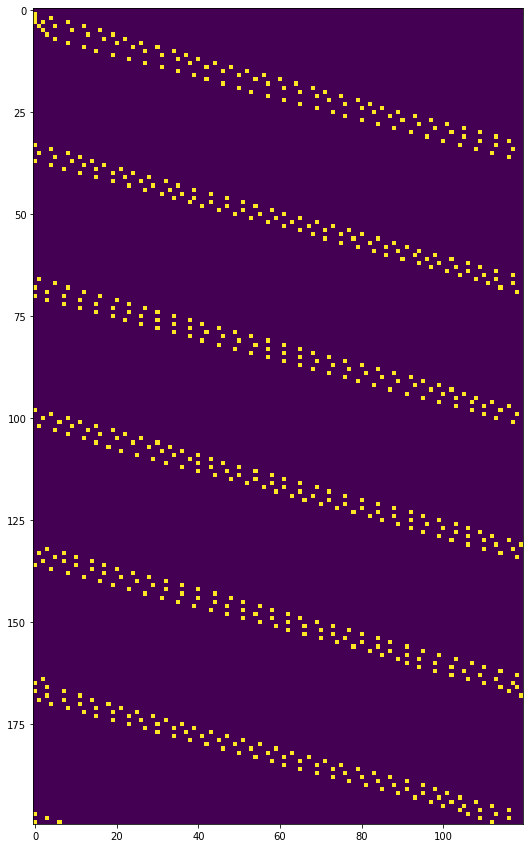

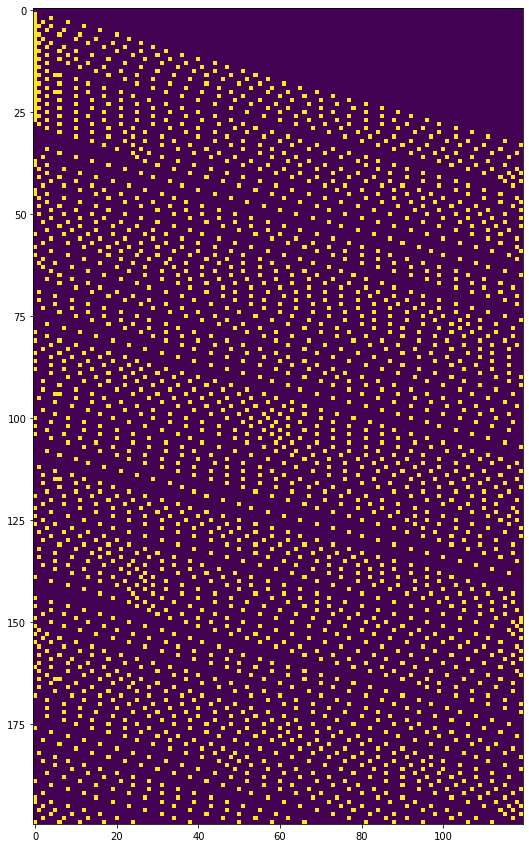

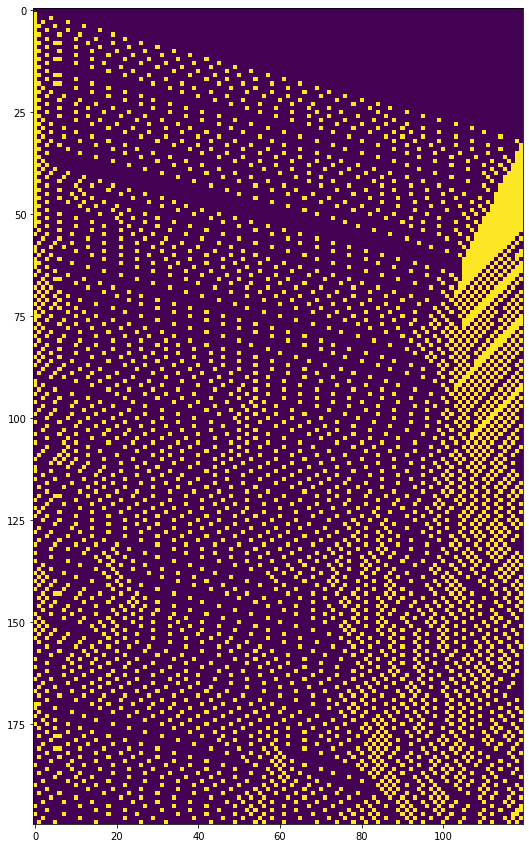

In [20]:
############# Output the road simulation for various traffic density ############
Closed_Single_Lane_Traffici(120, 2/100, 2, 5, 2, 200, 0.2) 
Closed_Single_Lane_Traffici(120, 11/100, 2, 5, 2, 200, 0.2) 
Closed_Single_Lane_Traffici(120, 20/100, 2, 5, 2, 200, 0.2) 

#### Comment:

When I vary the density of the road system, it can be found that when the density increases, jams are more likely to build up at start of the road. This is because when cars at the end of the road is about to cycle back to beginning of road, more cars are generated at the beginning of road, causing them to de-accelerate. Hence, this results in more jams at not only at the start, but the end of road. 

### Part 3 (Contains final code) <a name='3'></a>
### Date: 23-27/02/2021

Looking back at part 2, there could be a problem with the previous code that results in jams being generated at the ends of road. Therefore, to solve this issue, a different car generation method is employed. In this new method, all the cars needed to reach the set density of traffic are generated initially to road, which is done by iterating through how many cars are required. This is given by the density multipied `Den` by the `length` of road. In addition, every car is assigned to a random, empty site (denoted by the index of the road that ranges from 0 to `length`) on the road with a random velocity, and this is done by looping through a road array to search for empty sites.

This new method (one time generation of cars) ensures that the traffic will be kept at constant density, resolving the issue whereby a continuous generation of new cars builds up traffic jams at the beginning of road when the density increases. 


Below is the code:

    number_of_car = np.arange(0, Den*length, dtype=np.float64)
    
    for n in number_of_car:
        site = np.random.randint(0, length, 1)
        
        while Road[site]!=0:
            site = np.random.randint(0, length, 1)
        Road[site]=np.random.randint(Vinit, V_max, 1)
        
Note that  `np.arange(0, Den*length, dtype=np.float64)` is categorised to be float numbers because density `Den` is a float number.
        
Another problem I see from the part 2 simulation is that the traffic system become less jammed throughout the timesteps, so its density appears to decrease over timesteps. By testing over the codes for the 4 rules, the fault is found to be in the rule 4 code. When I revert from graphical illustration to number illustration and map the simulation(`.` represents no car present), I get the following output for `Closed_Single_Lane_Traffic(12, i/100, 2, 5, 2, 10, 0.5)` :

     [4.0, '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
     [4.0, '.', '.', 3.0, '.', '.', '.', '.', '.', '.', '.', '.']
     ['.', 1.0, '.', '.', '.', '.', 3.0, '.', '.', '.', '.', '.']
     ['.', '.', 1.0, '.', '.', '.', '.', '.', '.', 3.0, '.', '.']
     [3.0, '.', '.', '.', 2.0, '.', '.', '.', '.', '.', '.', '.']
     ['.', '.', '.', 3.0, '.', '.', 2.0, '.', '.', '.', '.', '.']
     [4.0, '.', '.', '.', '.', '.', '.', '.', '.', 3.0, '.', '.']
     ['.', '.', '.', 3.0, '.', '.', '.', '.', '.', '.', 1.0, '.']
     [2.0, '.', '.', '.', '.', '.', 3.0, '.', '.', '.', '.', '.']

We can see that a problem occurs in the 2nd timestep of the simulation, in which a car with a speed of 4$c/t$ at the first index at $1^{st}$ timestep decreases to 3$c/t$ at $2^{nd}$ timestep eventhough there is no car ahead of it. I speculate the problem could be resulted from the linking of the road. Hence I changed 

    Road = np.concatenate((Road, Road[:6 -> 7], np.zeros(6 -> 7))) and 
    
    np.concatenate((Road[-12:-6], Road[6:-12])) -> np.concatenate((Road[-14:-7], Road[7:-14])) .                     

The new output for `Closed_Single_Lane_Traffic(12, i/100, 2, 5, 2, 10, 0.5)`  is shown below:

     [4.0, '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
     ['.', '.', '.', '.', 4.0, '.', '.', '.', '.', '.', '.', '.']
     ['.', '.', '.', '.', '.', '.', '.', '.', 4.0, '.', '.', '.']
     ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 3.0]
     ['.', '.', 3.0, '.', '.', '.', '.', '.', '.', '.', '.', '.']
     ['.', '.', '.', '.', '.', '.', 4.0, '.', '.', '.', '.', '.']
     ['.', '.', '.', '.', '.', '.', '.', '.', '.', 3.0, '.', '.']
     [3.0, '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']

Now there is only a car in the road, and no additional car is generated throughout new timesteps. So the problem is likely to be resulted from the implementation of `np.concatenate()`. 

To resolve this problem, a new method is used to better implement the continuous road ; The entire road is copied (road doubled in length) , after which it will be decreased to its original length when the 4 rules takes effect. 

In this double road system, the first half of the copied road is placed in front of the second half of the original road. Since the cars in the copied road is the same as those in the original road, placing the copied road in front of the original road can generate a continuous road whereby cars at the second half of road can enter the first half of the copied road( equivlent to first half of original road) and meet with the replicated cars. Note here, the outer halves of the road is not used because, at the end of road, cars may drive pass the maximum element index of the road array, thus resulting in the road simulation not working properly. Below is part of the code:

    # Generating a copy of road
    Road = np.append((Road, Road))
    # Restore the road to its original length
    Road = np.append((Road[length: int(0.5*length) + length], Road[int(0.5*length):length]))

Another important thing which I notice is that Rule 3, the dawdling probability of cars, should proceed Rule 4 (movement of cars). This is because for Rule 3, it assigns random and different numbers to each car on the double road system, and because these numbers (less or bigger than dawdling percentage) determine the states (dawdle or not dawdle) for each car, this means that original traffic (filled with car) will be different from the copied traffic. Therefore, when the double-road is restored to its original length, problems may arise in the simulation like the number of cars increasing, or decreasing on the road. 

Therefore, implementation of Rule 3 should proceed Rule 4. 

Note that, in order to find the average speed of car on the road, a matrix is used to collect the speeds of car at every timestep. A matrix is also used to collect the car density. Below is the code:

    Coll_Mx = np.zeros((1, Timestep_total))
    
    Timestep_tot = np.arange(Timestep_total)
    
    while Timestep in Timestep_tot:
        
        # Average car speed/ Maximum car speed 
        Coll_Mx[0,Timestep]= (1/(V_max-1))*(sum(Road)/np.count_nonzero(Road) -1)
        
        
Now we can plot the new simulation. 

In [15]:
# Written using the help of Numpy documentation given by link
# https://numpy.org/doc/stable/reference/generated/numpy.insert.html 
# ,the book 'Programming for computation - Python' given by 
# the link https://link.springer.com/content/pdf/10.1007%2F978-3-030-16877-3.pdf.
# And professor. 

def Closed_Single_Lane_Traffic(length, Den, Vinit, V_max, Timestep_total, Prob_dawdle, category):
    ''' Returns a CA simulation of road system whereby cars drive under a number 
    of traffic rules
        
    Inputs:
    length          The length of the road 
    Den             Density of the traffic
    Vinit           Initial speed of a car
    V_max           Maximum speed of a car
    rate            Number of cars fed to road per timestep
    prob_car_daw    Car Dawdling probability 
    Timestep_total  Total number of timesteps  
        
    Output:
    Simulation of road system
    '''
    # Generate road, define timestep, matrix, and tolerance
    Timestep = 1
    Road = np.zeros(length) 
    Coll_Mx = np.zeros((1, Timestep_total))
    Mx = np.zeros((Timestep_total, length))
    Timestep_tot = np.arange(Timestep_total)
    Tolerance = 1e-4

    # Generation of cars to random sites of the road at random speeds
    
    number_of_car = np.arange(0, Den*length, dtype=np.float64)
    
    for n in number_of_car:
        site = np.random.randint(0, length, 1)
        
        while Road[site]!=0:
            site = np.random.randint(0, length, 1)
        Road[site]=np.random.randint(Vinit, V_max, 1)
        
    # Iterate over timesteps of array.
    while Timestep in Timestep_tot:
        
        # Copy road to generate lengthened road
        Road = np.append(Road, Road)

        ###################### CA Rule 1 ###################
        
        # If the velocity v of a car is less than V_max and if the distance 
        # to next car is larger than v+1, the car speed increases by 1
        
        Lengthened_Road = np.arange(length+length - V_max, -1, -1)

        for i in Lengthened_Road:
            if Road[i] > 1:                                
                if np.sum(Road[i+1:int(Road[i])+i+1], dtype=np.int32) == 0:
                    if V_max  > Road[i]:
                        Road[i] += 1
                        
                ###################### CA Rule 2 ###################
                
                # If a car at site i sees next vehicle at site i+j,
                # with speed j < v, it reduces speed to j - 1
                
                else:
                    n = 0
                    
                    # Calculate distance between two cars, 
                    # if there is a car n sites ahead
                    # with n < V_max, car speed will be n-1
                
                    if Road[i+1] < Tolerance: 
                        # Note that 1 is added on to account for road index 1 greater than car speed
                        
                        while Road[n+1+i]<1 and n < V_max:
                            n+=1  
                        Road[i]=n # n = distance between respective cars   
                        
                    # if there is car directly ahead, reduce speed to zero
                    else:
                        Road[i]=1
                    
                                 
        ###################### CA Rule 4 ###################
            
        # Each car moves by v sites.
            
            # Account for a stationary car .
            elif Road[i]==1:  
                
                # If no car ahead the stationary car will move at v = 1             
                if Road[i+1] < Tolerance: 
                    Road[i]=2               
         
        # Iterate from end to start of road because cars in front need to move first
        Lengthened_Road1 = np.arange(length+length - V_max, -1, -1)
        
        for i in Lengthened_Road1:
                
            # Cars advance through road
            Advance = i
            if Road[i]>0:                       
                Road= np.insert(Road, Advance+int(Road[i]), Road[i])       
                Road = np.delete(Road, i)
                
                      
        # Restore the road to its original length
        Road = np.append(Road[length: int(0.5*length) + length], Road[int(0.5*length):length])
                            
        ###################### CA Rule 3 ###################      
        # At probability p, each car reduces its speed by 1 
        
        Length_Road = np.arange(length)
        
        for i in Length_Road:
            if  Prob_dawdle*100 > np.random.randint(0, 100):       
                if Road[i]>1:                                     
                    Road[i]-=1
                                        
        ###############Collection Matrix##############
        
        # Average car speed/ Maximum car speed (Take into consideration that car speed = road element values -1 )
        Coll_Mx[0, Timestep]= (1/(V_max-1))*(sum(Road)/np.count_nonzero(Road) -1)
    
        ################# Matrix ####################
        
        Road_arange = np.arange(length)
        
        for i in Road_arange:
            if Road[i] < Tolerance:
                Mx[Timestep, i]= 0
            else:
                Mx[Timestep, i]= 1
        
        ############################################# 
        # Update timestep
        Timestep+=1
              
    if category == "MX":
        # Road's Illustration  
        plt.figure(figsize = (10,10))
        plt.imshow(Mx)
     
    else:
        # Return collection array to plot graphes   
        return Coll_Mx

#### Diagram for density 0.05 $car/cell$:

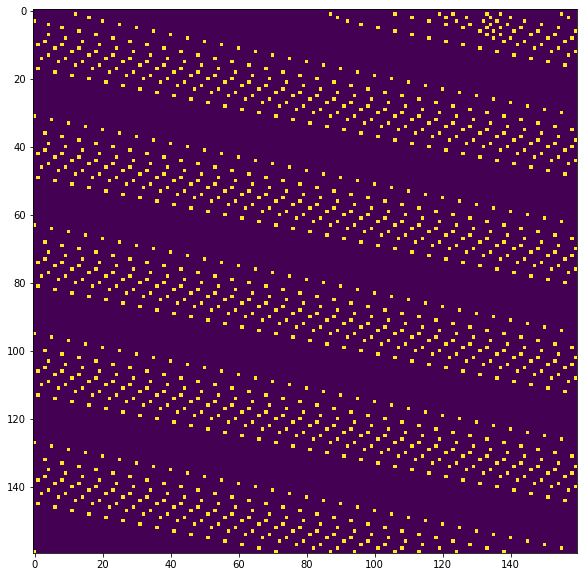

In [43]:
Closed_Single_Lane_Traffic(160, 5/100, 2, 6, 160, 0.12, "MX") # Road density 0.05 car/cell

#### Diagram for density 0.12 $car/cell$:

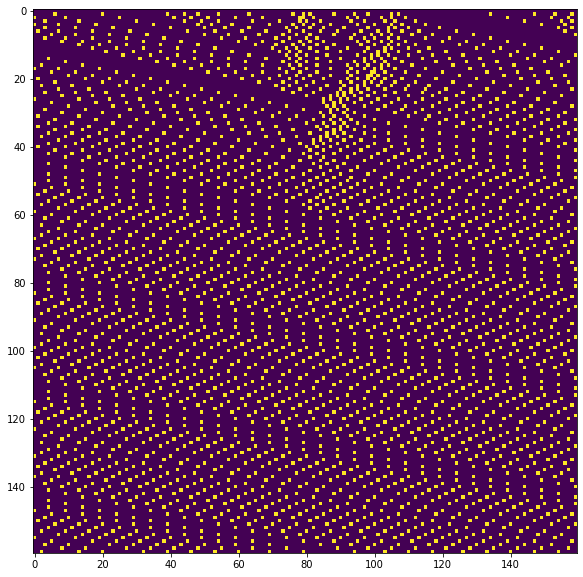

In [61]:
Closed_Single_Lane_Traffic(160, 12/100, 2, 6, 160, 0.12, "MX") # Road density 0.12 car/cell

#### Diagram for density 0.16 $car/cell$:

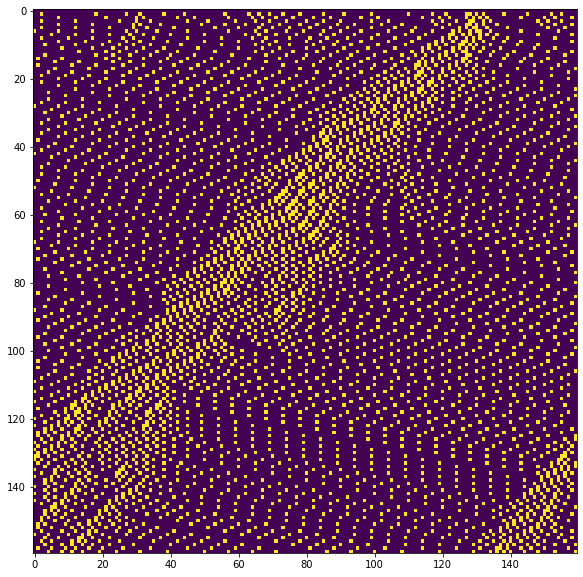

In [51]:
Closed_Single_Lane_Traffic(160, 16/100, 2, 6, 160, 0.12, "MX")

#### Diagram for density 0.20 $car/cell$:

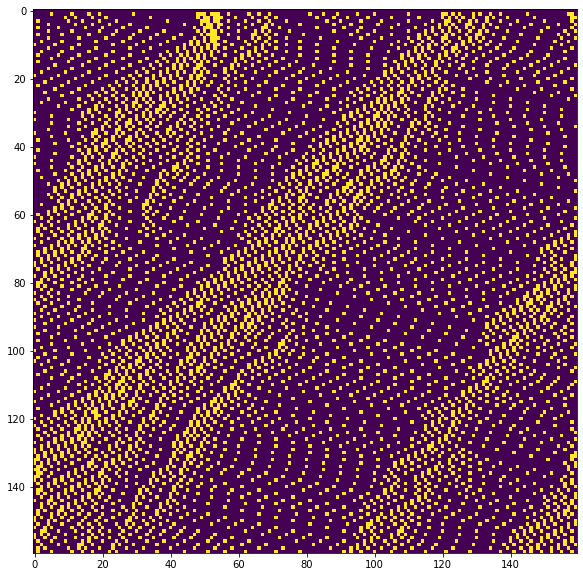

In [139]:
Closed_Single_Lane_Traffic(160, 20/100, 2, 6, 160, 0.12, "MX") # Road density 0.16 car/cell

## Results (Final code) <a name='Result1'></a>

### Average speed to maximum speed ratio for varying dawdling probabilities:

### Date: 2/03/2021

We now plot the car speed ratio over timesteps for varying dawdling probabilities, and see how this variation affect the car speed ratio over 110 timesteps. The speed ratio value will then be averaged over 110 simulations to give the average speed ratio.

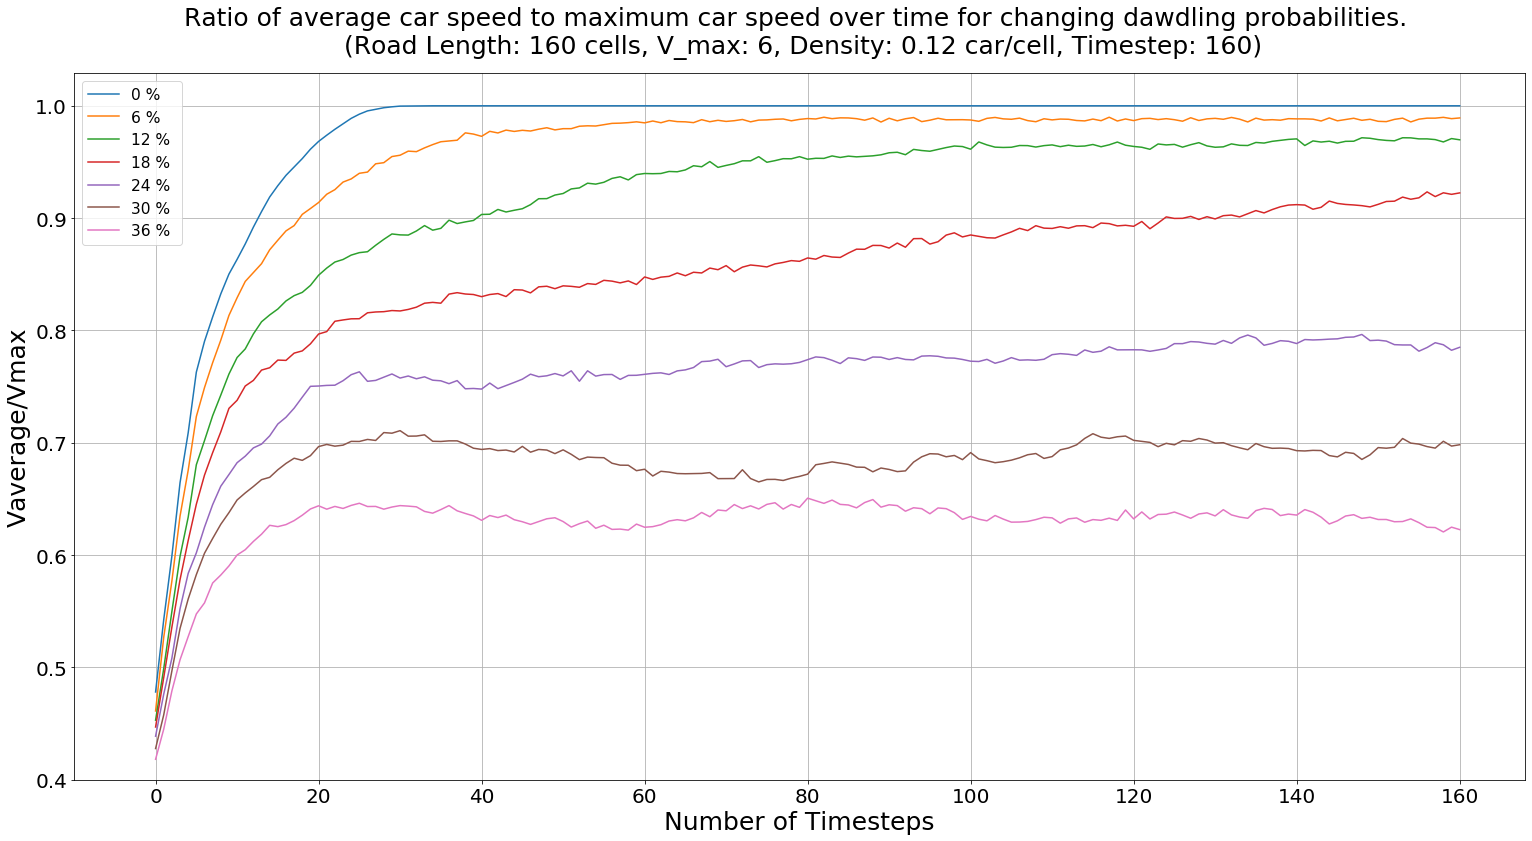

In [12]:
# Set parameters of the road function
length = 160
Den = 0.12
V_max = 6

# Total number of simulations
sim_t = 110

# Total number of timesteps (plus 2)
Timestep_t = 162

plt.figure(figsize=(26,13)) 

for n in range(0, 42, 6):
    speed_ratio = np.zeros(Timestep_t - 1)# Store car speed ratio in the form of array
    sim = 0
    while sim in range(sim_t):
        # Call Road function
        RoadFunc = Closed_Single_Lane_Traffic(length, Den , 2 , V_max, Timestep_t, n/100, 1)[0,1:162]
        speed_ratio += RoadFunc
        sim += 1
        
    speed_ratio/= sim_t
    
# Plot speed ratios against timesteps for varying dawdling probabilities
    plt.plot(speed_ratio, label = '{} % '. format(n) )      
    
plt.xlabel('Number of Timesteps', fontsize = 25)
plt.xticks(fontsize= 20 )
plt.xlim(xmin= -10)
    
plt.ylabel('Vaverage/Vmax',  fontsize = 25)
plt.yticks(fontsize= 20 )
plt.ylim(ymin = 0.4)
    
plt.title('Ratio of average car speed to maximum car speed over time for changing dawdling probabilities. \n (Road Length: 160 cells, V_max: 6, Density: 0.12 car/cell, Timestep: 160)', fontsize = 25, pad = 20)
plt.legend(loc = 'best', fontsize = 15.5) 
plt.grid()

#### Comment:

From the plot, we can observe that when the dawdling probabilities increases, the car speed ratio would generally converge to a lower value over time. Such result is also reasonable, because when cars are more likely to dawdle (slow down intentionally), so will the average speed of the cars in the traffic tend to go down.

#### Space-time diagram for varying dawdling probabilities:
### Date: 17/03/2021

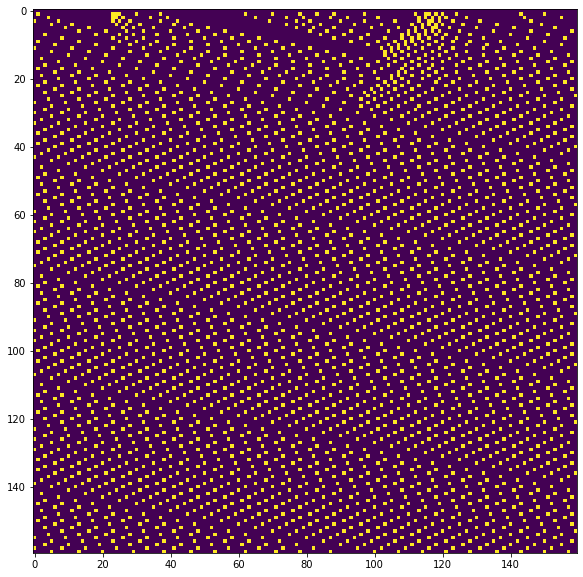

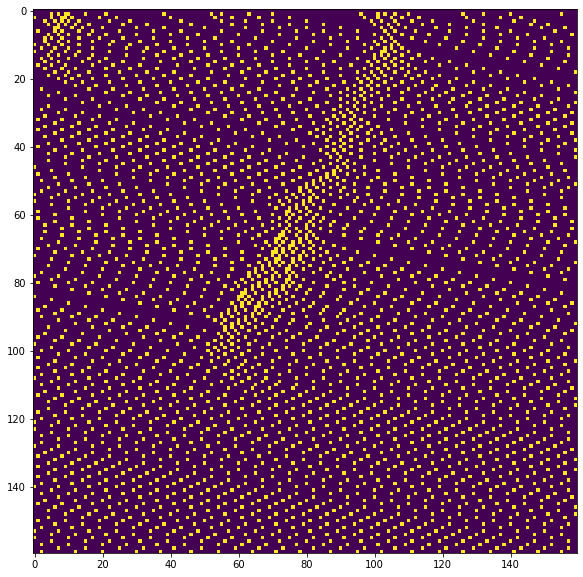

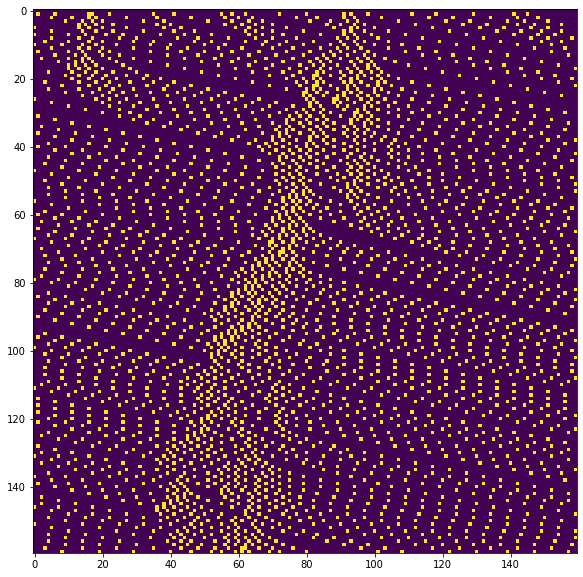

In [71]:
Closed_Single_Lane_Traffic(160, 12/100, 2, 6, 160, 0.04, "MX")
Closed_Single_Lane_Traffic(160, 12/100, 2, 6, 160, 0.20, "MX")
Closed_Single_Lane_Traffic(160, 12/100, 2, 6, 160, 0.28, "MX")

#### Comment:

When the dawdling probability increases, traffic jams lasting through longer timestep start to form on the road, so cars do not move at constant speed across the road.

### Average speed to maximum speed ratio for varying road density:
### Date: 3/03/2021

In order to investigate the effect of road density on the average speeds of the car, we shall plot the ratio of Average car to its maximum speed at varying road densities for 160 timesteps. Note that value of speed ratios is averaged over 110 road simulations.  Note the graph takes around 10 mins to generate, due to number of timesteps of the simulation and the number of times a simulation needs to repeat to obtain the average speed ratio at each timestep.

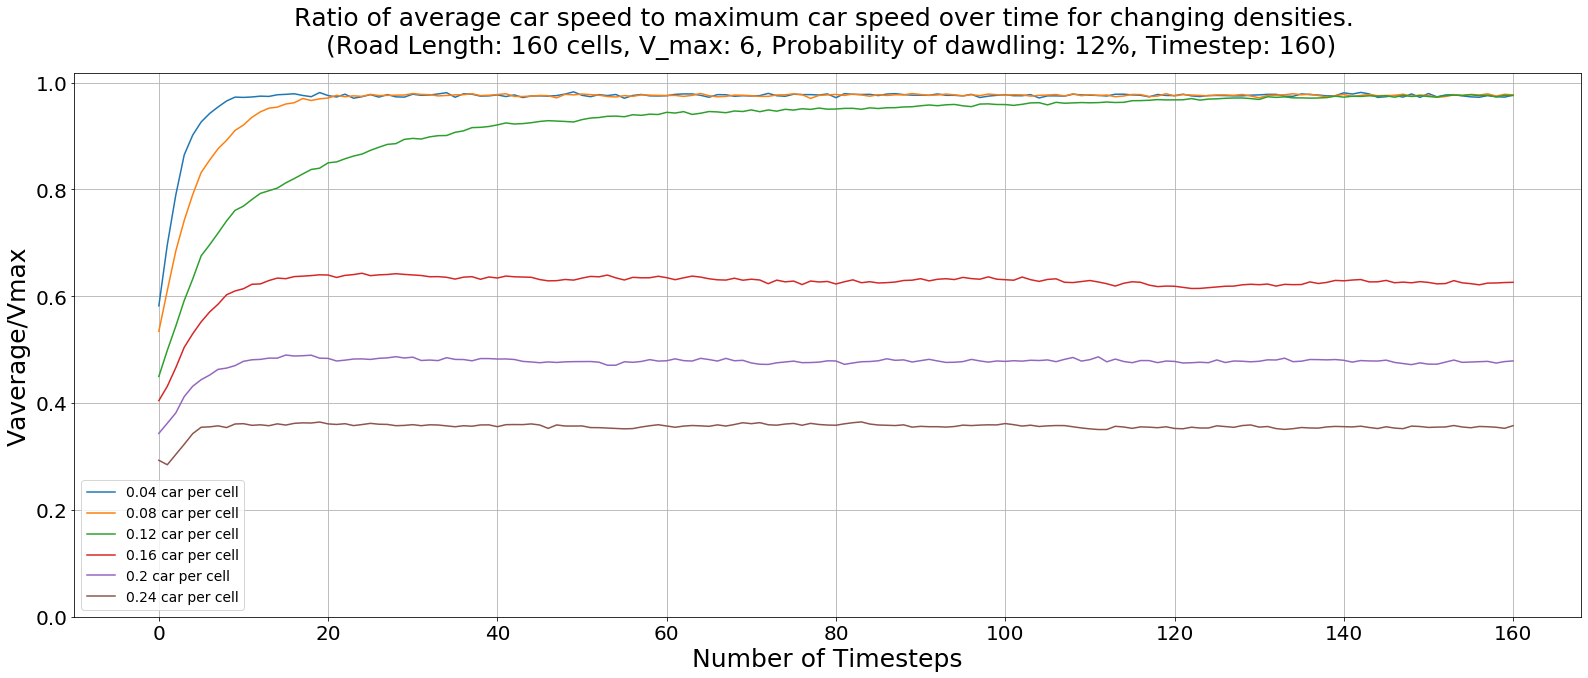

In [6]:
# Set parameters of the road function
length = 160
Prob_dawdle = 0.12
V_max = 6

# Total number of simulations  
sim_t = 110     

# Total number of timestep plus 2 
Timestep_t = 162 

# Generate plot
plt.figure(figsize=(27,10)) 

for n in range(4, 25,4):
    speed_ratio = np.zeros(Timestep_t - 1)# Store car speed ratio in the form of array
    sim = 0
    while sim in range(sim_t):
        # Call Road function
        RoadFunc = Closed_Single_Lane_Traffic(length, n/100 , 2 , V_max, Timestep_t, Prob_dawdle, 1)[0,1:162]
        speed_ratio += RoadFunc
        sim += 1
        
    speed_ratio/= sim_t
    
# Plot speed ratios against timesteps for varying traffic densities
    plt.plot(speed_ratio, label = '{} car per cell'. format(n/100) )      
    
plt.xlabel('Number of Timesteps', fontsize = 25)
plt.xticks(fontsize= 20 )
plt.xlim(xmin= -10)
    
plt.ylabel('Vaverage/Vmax',  fontsize = 25)
plt.yticks(fontsize= 20 )
plt.ylim(ymin = 0)
    
plt.title('Ratio of average car speed to maximum car speed over time for changing densities. \n (Road Length: 160 cells, V_max: 6, Probability of dawdling: 12%, Timestep: 160)', fontsize = 25, pad = 20)
plt.legend(loc = 'best', fontsize = 13.9) 
plt.grid()   

#### Comment:

We can see that, when the road density increases, the average to maximum speed ratio decreases. This is resonable, because when there are more cars on the road, there will generally be less spacing between the cars, ie., a car distance to its next car is less than distance it will travel in the next timestep. Hence, at higher densities, cars will be more susceptible to being slow down, by CA rule 2. In addition, we see that at densities $0.05$ car per cell and $0.10$ car per cell, their speed ratios both approach to values close to 1 over time, which mean that cars at these densities travel at close to its maximum speeds over time. 

### Date: 4/03/2021

We now zoom in on the previous graph, to see at what density value does the speed ratio no longer to value close to 1 overtime ( Car no longer travel at its maximum speed overtime).

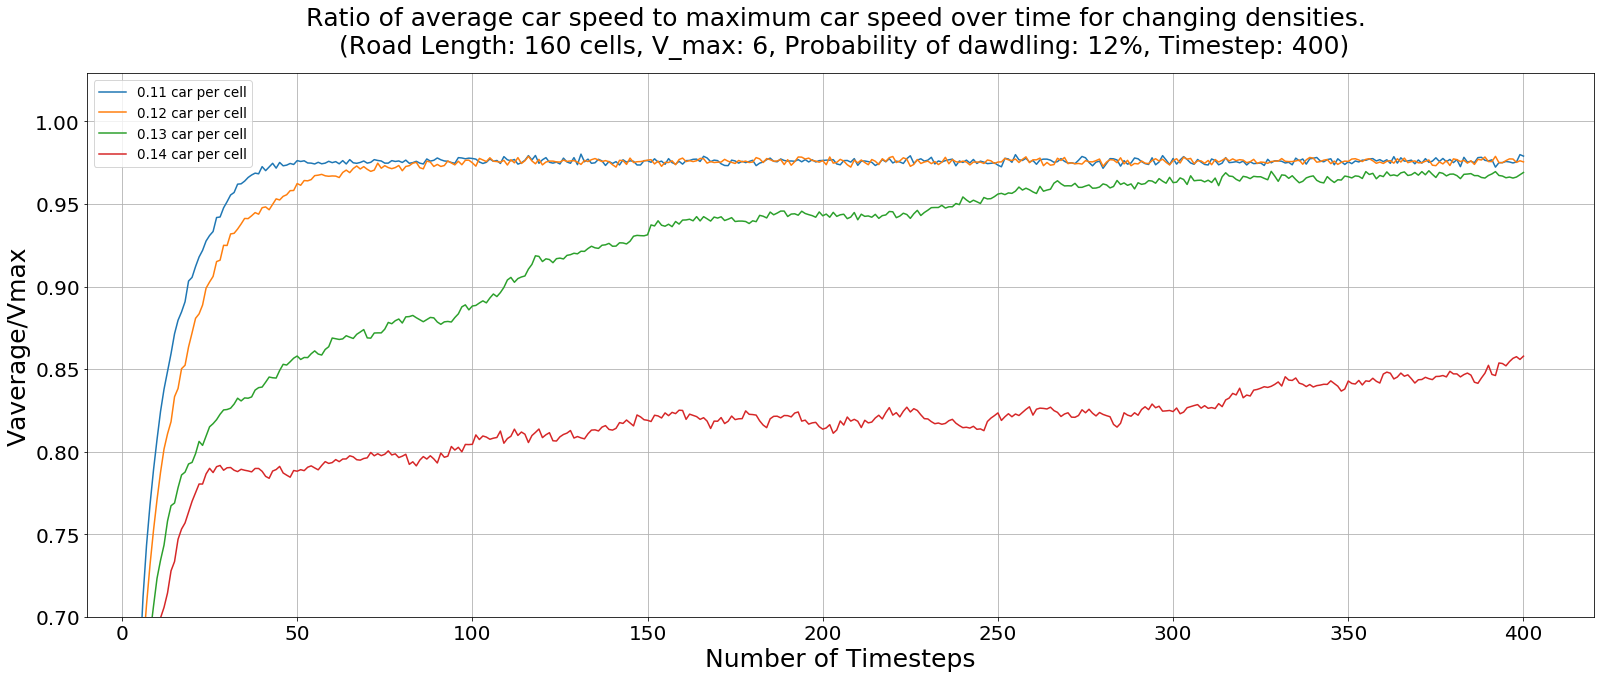

In [3]:
# Set parameters of the road function
length = 160
Prob_dawdle = 0.12
V_max = 6

# Total number of simulations
sim_t = 110 

# Total number of timestep plus 2
Timestep_t = 402  

# Generate plot
plt.figure(figsize=(27,10)) 

for n in range(11, 15, 1):
    speed_ratio = np.zeros(Timestep_t - 1)# Store car speed ratio in the form of array
    sim = 0
    while sim in range(sim_t):
        # Call Road function
        RoadFunc = Closed_Single_Lane_Traffic(length, n/100 , 2 , V_max, Timestep_t, Prob_dawdle, 1)[0,1:402]
        speed_ratio += RoadFunc
        sim += 1
        
    speed_ratio/= sim_t
    
# Plot speed ratios against timesteps for varying traffic densities
    plt.plot(speed_ratio, label = '{} car per cell'. format(n/100) )      
    
plt.xlabel('Number of Timesteps', fontsize = 25)
plt.xticks(fontsize= 20 )
plt.xlim(xmin= -10)
    
plt.ylabel('Vaverage/Vmax',  fontsize = 25)
plt.yticks(fontsize= 20 )
plt.ylim(ymin = 0.7)
    
plt.title('Ratio of average car speed to maximum car speed over time for changing densities. \n (Road Length: 160 cells, V_max: 6, Probability of dawdling: 12%, Timestep: 400)', fontsize = 25, pad = 20)
plt.legend(loc = 'best', fontsize = 13.5) 
plt.grid()
              

#### Comment:


We can see that the speed ratios converges to approximately 1 overtime until the road density increases past $0.12$ car per cell . At $0.13$ car per cell, the speed ratio converges to approximately 1, but is lower than ratios in which densities $0.11$ and $0.12$ converge to.

### Date: 5/03/2021

Now we plot the cars average to maximum speed ratio, measured at the 160th timestep (final timestep of simulation) , against the road density. The speed ratio is averaged over 25 simulations. Note that minimum density cannot be set to 0, so instead we need to set a minimum density to be slightly greater than 0. Also, the  maximum speed $v_{max}$ of cars is $v_{max}$ = $6$ $cells/timestep$.




Below shows the plot of car speed ratio over changing densities of the road at the last timestep of the simulation.  

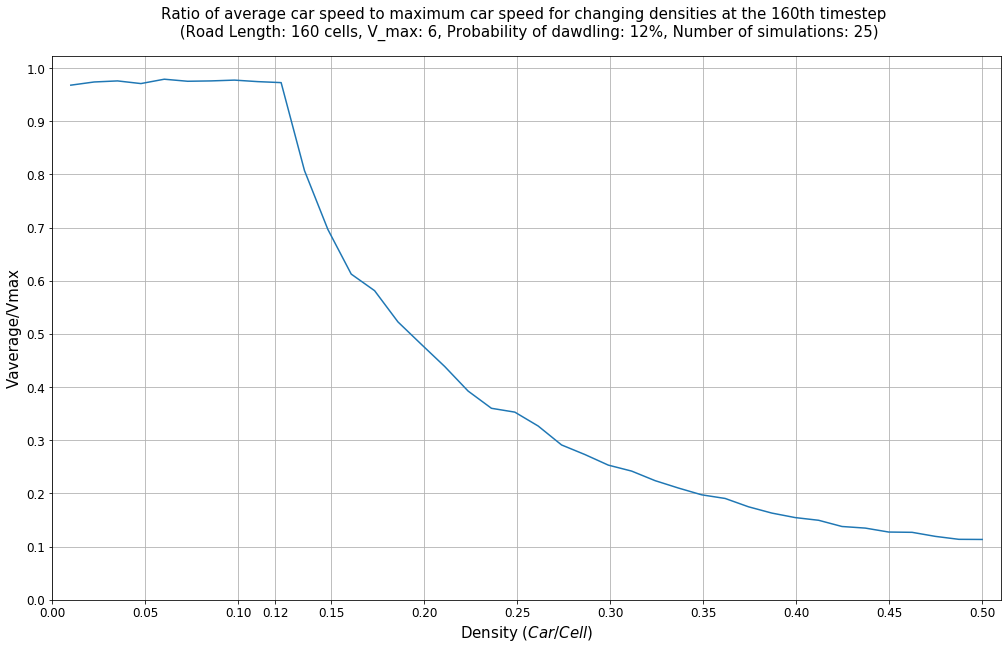

In [7]:
# Set parameters of the road function
length = 160
Prob_dawdle = 0.12
V_max = 6

# Number of simulations and timestep + 2
sim_t = 25
Timestep_t = 162

# Define density grid, store average speed/max speed 
initial_den = np.linspace(0.01, 0.5, 40)
This_speed_ratio = []

for den in initial_den:
    # car average speed to max speed ratio at each density point
    speed_ratio = np.zeros(1)
    sim = 0
    while sim in range(sim_t):
        # Take car average speed to max speed ratio at last timestep 
        RoadFunc = Closed_Single_Lane_Traffic(length, den , 2 , V_max, Timestep_t, Prob_dawdle, 1)[0,-1]
        speed_ratio += RoadFunc 
        sim += 1

    speed_ratio /= sim_t
    This_speed_ratio.append(speed_ratio)
    
# plot speed ratio against density

plt.figure(figsize=(17,10))

plt.plot(initial_den, This_speed_ratio)


plt.xticks([0, 0.05, 0.1,0.12, 0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5], fontsize = 12) 
plt.xlabel(r'Density $(Car/Cell}$)', size = 15)
plt.xlim(xmin= 0, xmax = 0.51)

plt.yticks(np.arange(0, 1.01, 0.1), fontsize= 12 )
plt.ylabel('Vaverage/Vmax',  size = 15)
plt.ylim(ymin = 0)

plt.title('Ratio of average car speed to maximum car speed for changing densities at the 160th timestep \n (Road Length: 160 cells, V_max: 6, Probability of dawdling: 12%, Number of simulations: 25)', size = 15, pad = 20)
plt.grid()

#### Comment:

We observe that, at between density = 0.01 $car/cell$ to Density = 0.12 $car/cell$, the car speed ratios to be almost to be 1, meaning that, on average, cars at these densities travel at the maximum speed over time. For density > 0.12 $car/cell$, the cars speed ratio would gradually fall off. This is consistent with the results from the plots showing the change of speed ratio over time for varying densities, in which the speed ratio does not appromixates to 1 when the road density increases past 0.12 $car/cell$ to 0.13 $car/cell$.

### Average speed to maximum speed ratio for varying maximum speeds:

### Date: 07/03/2021

The results of the speed ratios from the previous graphes are based on the maximum speed 6 $cells/timestep$ of a car, if we assume that each cell represents 1 meter of the road and one timestep represent 1 second, a maximum speed of 6 $m/s$ is pretty low for a car. Hence, I would like to see how varying the car maximum speeds can affect the speed ratios over time.

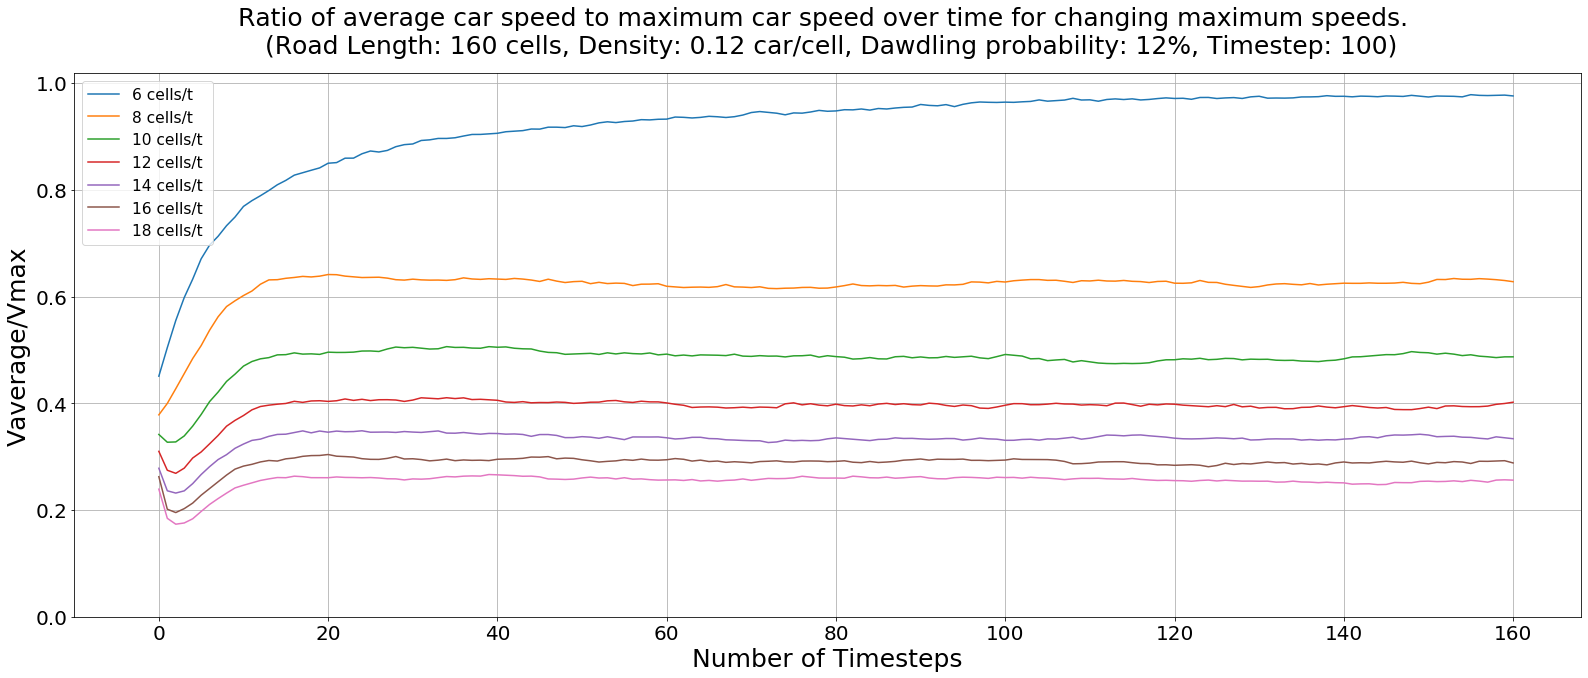

In [23]:
# Set parameters of the road function
length = 160
Den = 0.12
Prob_dawdle = 0.12

# Total number of simulations
sim_t = 110

# Total number of timesteps +2
Timestep_t = 162

plt.figure(figsize=(27,10)) 

for n in range(6, 20, 2):
    speed_ratio = np.zeros(Timestep_t - 1)# Store car speed ratio in the form of array
    sim = 0
    while sim in range(sim_t):
        # Call Road function
        RoadFunc = Closed_Single_Lane_Traffic(length, Den , 2 , n, Timestep_t, Prob_dawdle, 1)[0,1:162]
        speed_ratio += RoadFunc
        sim += 1
        
    speed_ratio/= sim_t
    
# Plot speed ratios against timesteps for varying car maximum speeds
    plt.plot(speed_ratio, label = '{} cells/t '. format(n) )      
    
plt.xlabel('Number of Timesteps', fontsize = 25)
plt.xticks(fontsize= 20 )
plt.xlim(xmin= -10)
    
plt.ylabel('Vaverage/Vmax',  fontsize = 25)
plt.yticks(fontsize= 20 )
plt.ylim(ymin = 0)
    
plt.title('Ratio of average car speed to maximum car speed over time for changing maximum speeds. \n (Road Length: 160 cells, Density: 0.12 car/cell, Dawdling probability: 12%, Timestep: 100)', fontsize = 25, pad = 20)
plt.legend(loc = 'best', fontsize = 15.5) 
plt.grid()

#### Comment:

We can see that when the maximum speed of a car increases, the speed ratios corresponding to such densities also converges to lower value over time. This is because, for a higher maximum speed of car, the car would be need more space  and distance between itself and the next car in order to accelerate to its Vmax. Since the length of the road does not change, a car with higher maximum speed naturally takes up more spaces, and this decreases the spacings between adjacent cars, thus preventing the car from accelerating to Vmax. Therefore, for higher maximum speed of car, the speed ratio converges to a lower value.

In addition, note that speed ratios initially decrease from their initial values for higher maximum speeds. This is due to implemenetation of the cars generations in the programme . When the maximum speeds of the cars are set to be higher, the cars are morely likely to be randomly assigned greater speeds when being introduced to a road, hence the average initial speeds of cars with higher maximum speeds are on average greater. However, due to limited space betweeen cars on the road as constrained by the road density, cars with higher initial speeds are more likely to be slowed down because of insufficient spacing between cars (stated by rule 2). Hence, the higher the maximum speed of the car, the greater the decline of the speed ratio from its value initially.

In order to see how maximum speed of cars will change traffic flow, we plot the road diagrams for varying maximum speeds from 3 cells/timesteps to 5 cells/timesteps, and then compare those diagrams.


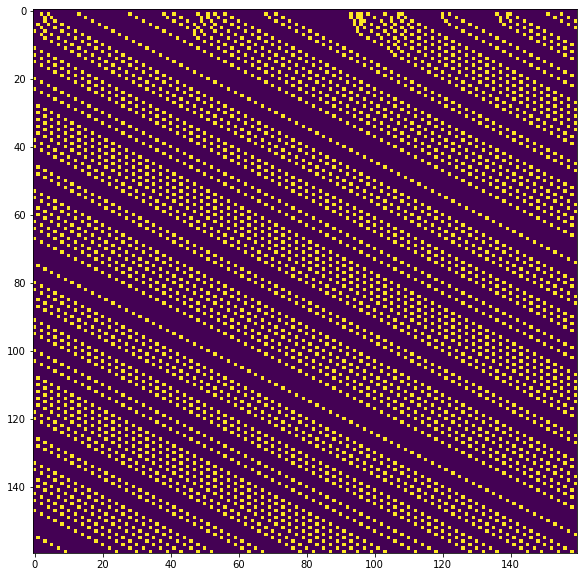

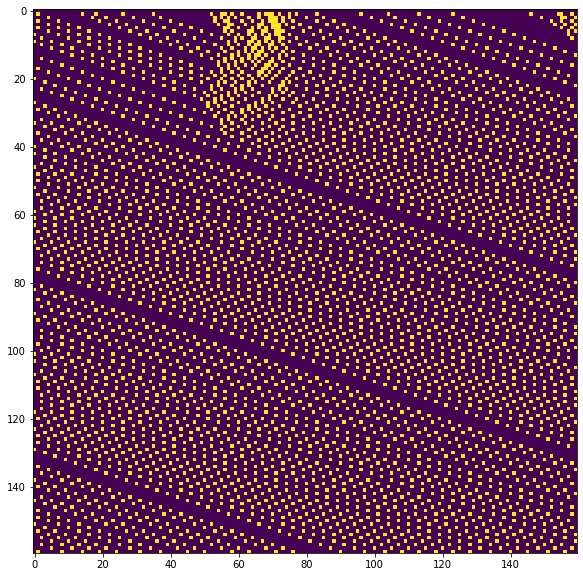

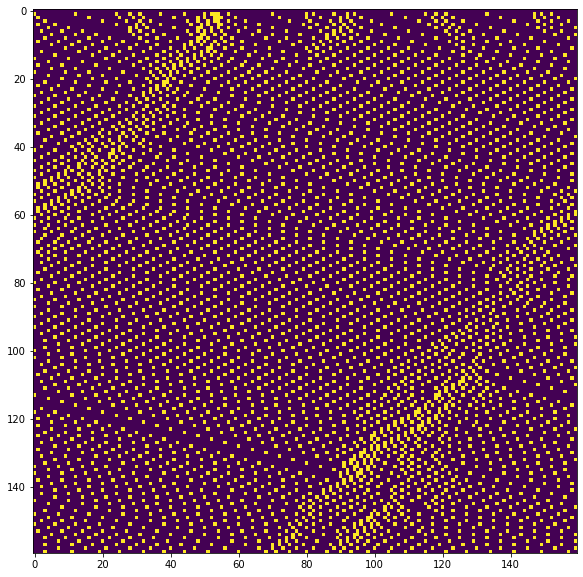

In [132]:
# Traffic flow at different Vmax from 3 cells/timesteps to 5 cells/timesteps
Closed_Single_Lane_Traffic1(160, 0.16, 2, 3, 160, 0.12, 'MX')
Closed_Single_Lane_Traffic1(160, 0.16, 2, 4, 160, 0.12, 'MX')
Closed_Single_Lane_Traffic1(160, 0.16, 2, 5, 160, 0.12, 'MX')

#### Comment:

We can see that when the car maximum speed decreases, there will be less jams formed on the road and they will last for shorter durations. This means that a more optimal traffic flow can be accomplished for decrease in car maximum speeds. Upon obtaining the results for the 1-lane traffic, we shall now see if the simulation can be extended to a 2-lane traffic.

# Two-Lane system <a name='Multi-Lane'></a>

## Generation of Two-Lane <a name='2Lane'></a>
### Date: 9/03/2021

A Two-Lane road will be generated using a `np.zeros((2,length))` matrix with 2 rows representing the 2 lanes and columns representing the length of the road. To better identify the 2 seperate lanes( left and right lanes), we use slicing to seperate the 2 lanes, in which the 0th row index represents the left-lane and the 1th row index represents the right-lane. 

In [1]:
# Import modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
length = 10
TwoRoad = np.zeros((2, length))
L_Lane = TwoRoad[0,]
R_Lane = TwoRoad[1,]

print("Two Lane:\n", TwoRoad)
print("\n Left-Lane:", L_Lane)
print("\n Right_Lane:",R_Lane)

Two Lane:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 Left-Lane: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

 Right_Lane: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Rules for lane changing (Implementation to be continued ) <a name='Rules'></a>
### Date: 11/02/2021

To consider switching lane (From the slower left-lane to right-lane), a car should do so based on two reasons. First, the drivers expect being able to drive more freely on the new lane. And secondly, on the ground of safety, the drivers changing to new lane should not force other drivers to brake too hard.
In order to fulfill these 2 conditions, it will be helpful to consider Rule 1 when changing lanes. For a car to change lane, it should be sure there is sufficient empty space for the lane that it will move into, such that it can speed up, given its distance to next car is greater than distance it will travel in the next timestep. 

In addition, we should also consider Rule 2 for lane changing. First, the driver should change lane when its distance to next car is less than its distance travelled in the next timestep and hence its current speed, forcing it to slow down. The slow down of car may also occur if the speed of car in front is less than speed of the car behind. Upon changing lanes, the car should ensure there is no car sufficiently close in front that will force it to slow down. Likewise, the lane-changing car should not force cars behind it to slow down, on the ground of safety. 

Lastly, for cars on the right-Lane moving to left-lane, the rules are pretty similar to cars moving from left-lane over to right-lane; On the ground of safety, cars on the right-lane should ensure that no car on the left-lane will not occupy the space that it also intend to move into. In addition, it should be reasonable that car on the faster right-lane does not intend to overtaking cars on the left-lane. 

However, considering time remaining for the project, the implementation of these rules shall be reached in the future (A part of future work).

## Future work <a name='Future,Work'></a>
### Date: 13/03/2021 

For the future work of the project, we shall extend the simulation of road to a Two-Lane system, by implementing the lane-changing rules that I set in the above section. In the 2-lane system, we can study traffic flow pattern for the same type of vehicle, and for different types of vehicles, that is, vehicles with different maximum speeds . An interesting feature that we can study for the 2-lane system is the number of cars on each lane (left and right) and the average speeds of cars on each lane. Beyond the 2-lane system, we can also strive to implement 3-lane or 4-lane system, and then observe how cars behave in traffic when they are given even more freedom to switch between lanes. 

In addition to extending the number of lanes, we could also investigate on special circumstances that occurs in traffic, such as road works or accidents on a particular lane, and to see how the drivers would respond to such events. It'will be intesting to see whether all the cars on the affected lane switch to other lanes, or will some cars stay on the original lane, and how will the transitions of cars affect the movement of the original cars on the new lane (Will they move faster, or slower when a new car gets introduced, and would they also consider switching into another lane if they need to slow down?). The interactions of car when unexpected circumstances occur in mult-lane system can give rise to additional flow patterns that are distinct from that of a 1-lane system , because cars on the 1-lane system are not given the freedom to move between lanes.

Regarding additional change of parameters, the speed limits of the cars for the simulation can also be changed. Specifically, we can allow the cars to move faster on average by increasing the maximum speed we set in the function. This will allow us to better simulate real life traffic, because the car's maximum speed that is set in the simulation is 6 $cells/timestep$, which is certainly lower than maximum speed of real cars.

By extending the simulation to include multiple-lane traffic, considering for the unexpected circumstances, and adjusting the maximum speeds of car to better match that of the real cars, one should be able to better understand traffic flow and the formation of different flow patterns. Those extension would be what I shall pursue in the future. 

## References <a name='References'></a>
### Date: 15/03/2021 

- [1]  A. Chow et al., “ Centralised and decentralised signal timing optimisation approaches for network traffic control,” ISTTT., vol. 113, pp. 108-123, Apr. 2020. 


- [2]  J. Shurkin. (2013, Nov. 11).  Fluid Dynamics Explains Some Traffic Jams. [Online]. Realclearscience.com. Available: https://www.realclearscience.com/articles/2013/11/12/fluid_dynamics_explains_some_traffic_jams_108348.html [Accessed 15 Feb. 2021]


- [3]  J. Sorsa et al., “ Elevator Selection with Destination Control System,” EW., vol. 54, no. 1, pp. 148-155, Jan. 2006.


- [4]  K. Nagel and M. Schreckenberg, “A cellular automaton model for freeway traﬀic,”  J. Phys. I. France., vol.             2, no. 12, pp. 2221-2229, Dec. 1992.


- [5]  M. Glaskin. (2008, March. 04). Shockwave traffic jam recreated for first time. [Online]. Newscientist.com.  Available:  https://www.newscientist.com/article/dn13402-shockwave-traffic-jam-recreated-for-first-time/  [Accessed 1 Feb. 2021]


- [6]  S. Linge and H. P. Langtangen, “ Programming for Computations - Python,” in Computational Science and Engineering, 2nd ed. Cham , Switzerland: Springer, 2020, pp. 59-82. [Online]. Available: https://link.springer.com/content/pdf/10.1007%2F978-3-030-16877-3.pdf. 


- [7]  S. Maerivoet and B. De. Moor, “ Cellular automata models of road traffic,” Phys. Rep., vol. 419, no. 1, pp. 1-40, Nov. 2005.


* [Back to Table of contents](#Contents)